In [761]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import numpy as np
from positional_encodings.torch_encodings import *

import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau

from pyvis.network import Network
from IPython.display import display, HTML

### Dataset generation

Cycle created between nodes 0, 4, and 11.
Cycle created between nodes 4, 12, and 0.
Cycle created between nodes 13, 1, and 0.
Cycle created between nodes 11, 13, and 9.
Cycle created between nodes 4, 5, and 3.
Cycle created between nodes 4, 5, and 14.
Cycle created between nodes 13, 6, and 4.
Cycle created between nodes 1, 9, and 4.
Cycle created between nodes 12, 3, and 11.
Cycle created between nodes 9, 14, and 2.
Checking isomorphism for graphs with cycles:
Graphs 0 and 1 are not isomorphic.
Graphs 0 and 2 are not isomorphic.
Graphs 0 and 3 are not isomorphic.
Graphs 0 and 4 are not isomorphic.
Graphs 0 and 5 are not isomorphic.
Graphs 0 and 6 are not isomorphic.
Graphs 0 and 7 are not isomorphic.
Graphs 0 and 8 are not isomorphic.
Graphs 0 and 9 are not isomorphic.
Graphs 1 and 2 are not isomorphic.
Graphs 1 and 3 are not isomorphic.
Graphs 1 and 4 are not isomorphic.
Graphs 1 and 5 are not isomorphic.
Graphs 1 and 6 are not isomorphic.
Graphs 1 and 7 are not isomorphic.
Graphs 1 a

/var/folders/z7/4w4x_vfs7k79ky63zf8xhj2w0000gn/T/ipykernel_92894/1609078518.py:29: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrices.append(nx.adjacency_matrix(base_graph).todense())
/var/folders/z7/4w4x_vfs7k79ky63zf8xhj2w0000gn/T/ipykernel_92894/1609078518.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrices.append(nx.adjacency_matrix(new_graph).todense())


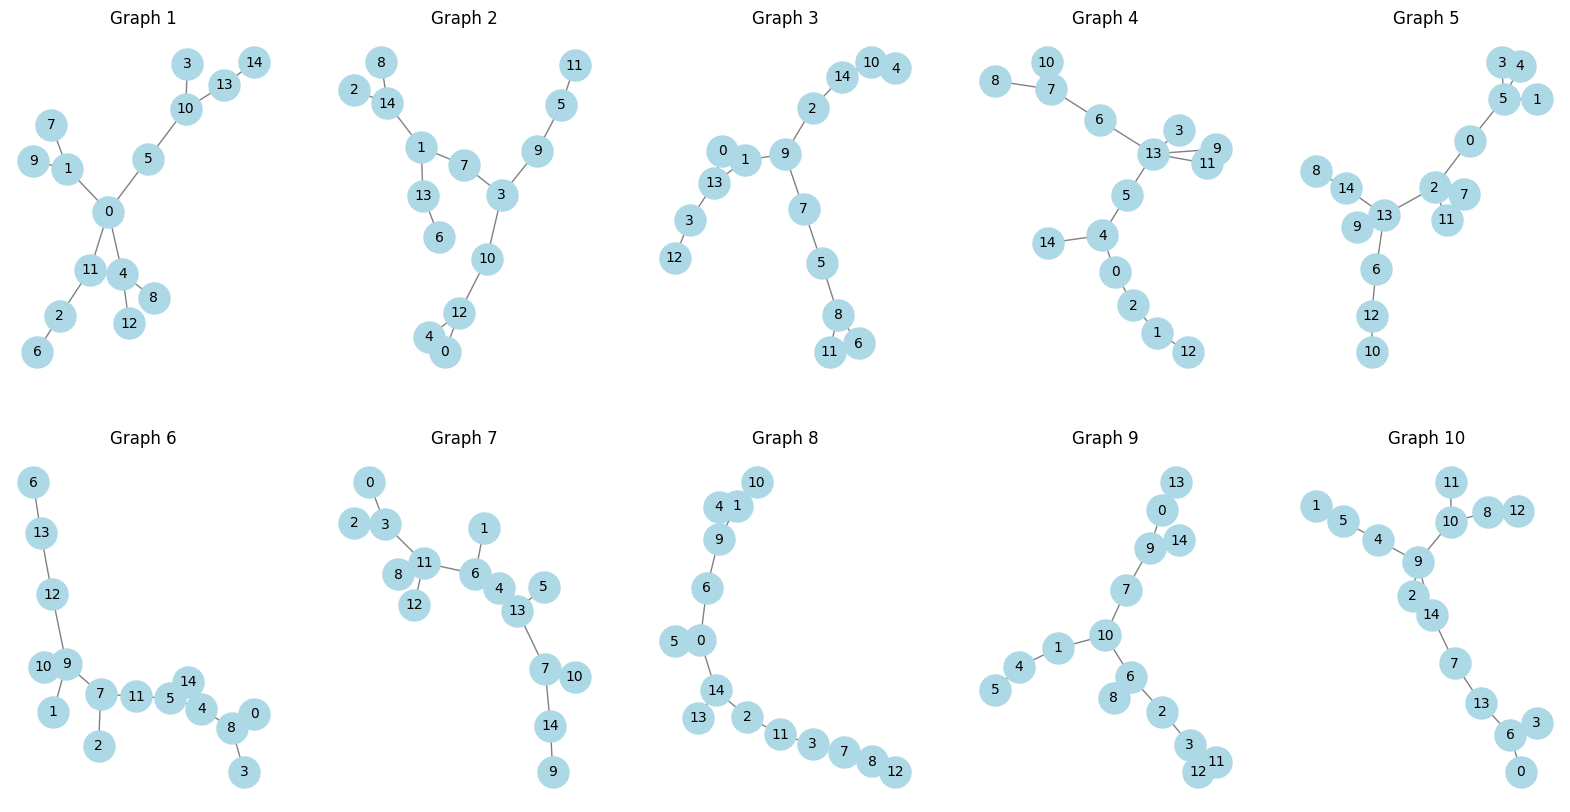

Graph 1 adjacency matrix:
[[0 1 0 0 1 1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 1 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]

Graph 2 adjacency matrix:
[[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 

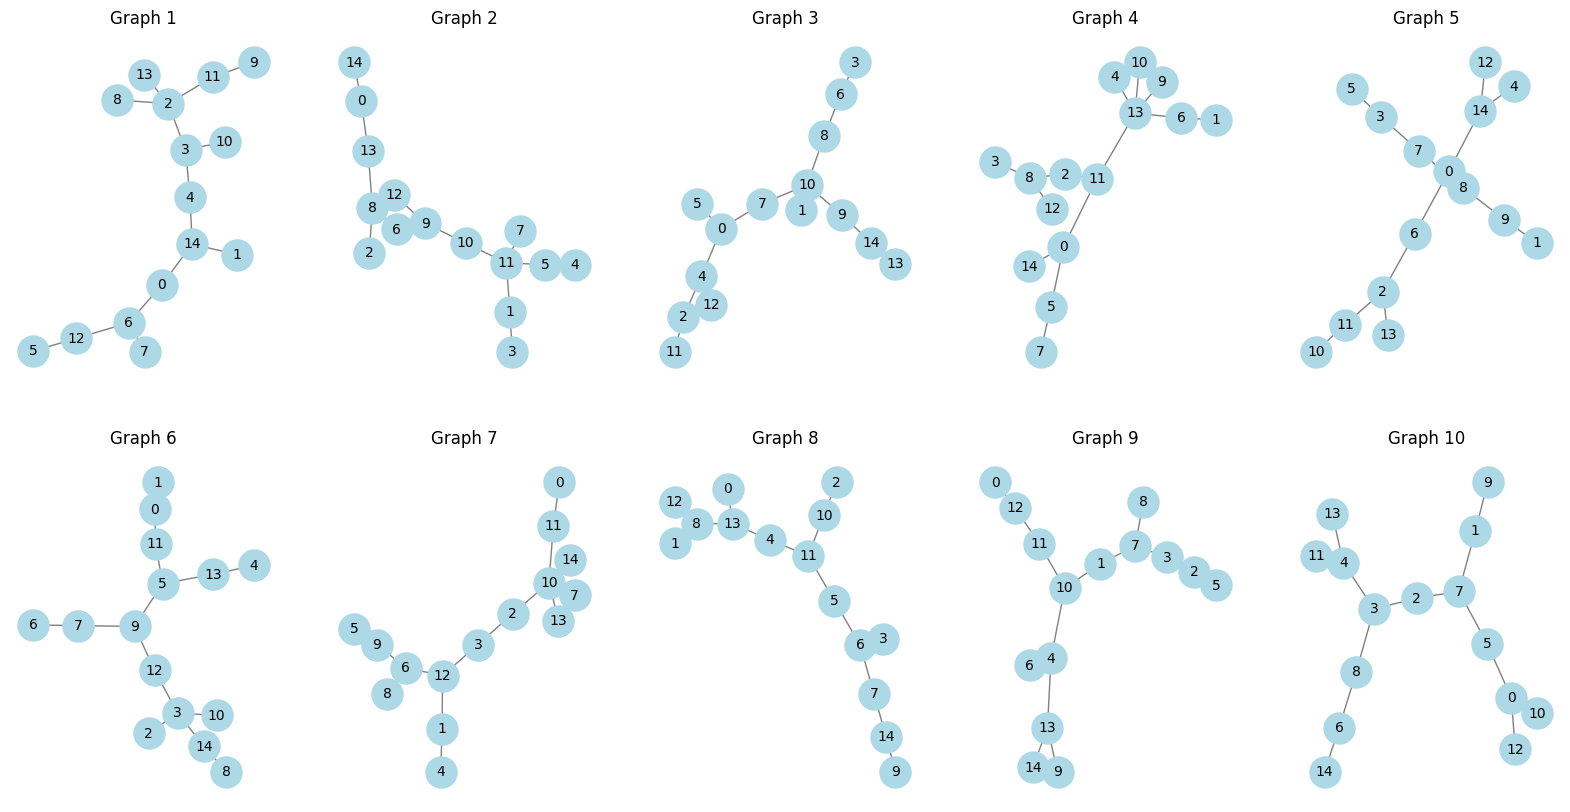

Graph 1 adjacency matrix:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]]

Graph 2 adjacency matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 

In [784]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def generate_base_graph(num_nodes, allow_cycles):
    if allow_cycles:
        graph = nx.random_tree(num_nodes)
        nodes_with_degree_2 = [node for node in graph.nodes() if graph.degree(node) >= 2]
        if nodes_with_degree_2:
            node = random.choice(nodes_with_degree_2)
            neighbors = list(graph.neighbors(node))
            if len(neighbors) >= 2:
                a, b = random.sample(neighbors, 2)
                graph.add_edge(a, b)
                # Print the nodes involved in the cycle
                print(f"Cycle created between nodes {a}, {b}, and {node}.")

    else:
        graph = nx.random_tree(num_nodes)
    return graph

def generate_potentially_isomorphic_graphs(num_nodes, allow_cycles, num_graphs=10):
    graphs = []
    adjacency_matrices = []
    
    base_graph = generate_base_graph(num_nodes, allow_cycles)
    graphs.append(base_graph)
    adjacency_matrices.append(nx.adjacency_matrix(base_graph).todense())
    
    for _ in range(num_graphs - 1):
        new_graph = generate_base_graph(num_nodes, allow_cycles)
        graphs.append(new_graph)
        adjacency_matrices.append(nx.adjacency_matrix(new_graph).todense())
    
    return graphs, adjacency_matrices

def check_isomorphism(graphs):
    for i in range(len(graphs)):
        for j in range(i+1, len(graphs)):
            if nx.is_isomorphic(graphs[i], graphs[j]):
                print(f"Graphs {i} and {j} are isomorphic.")
            else:
                print(f"Graphs {i} and {j} are not isomorphic.")

def plot_graphs(graphs, adjacency_matrices):
    plt.figure(figsize=(20, 10))
    for i, g in enumerate(graphs[:10]):
        plt.subplot(2, 5, i + 1)
        nx.draw(g, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
        plt.title(f'Graph {i + 1}')
    plt.show()

    for i, adj_matrix in enumerate(adjacency_matrices[:5]):
        print(f"Graph {i + 1} adjacency matrix:")
        print(adj_matrix)
        print()

# Example usage
num_nodes = 15  # Using a smaller number of nodes for clarity
allow_cycles = True
graphs_with_cycles, adj_matrices_with_cycles = generate_potentially_isomorphic_graphs(num_nodes, allow_cycles)

print("Checking isomorphism for graphs with cycles:")
check_isomorphism(graphs_with_cycles)

allow_cycles = False
graphs_without_cycles, adj_matrices_without_cycles = generate_potentially_isomorphic_graphs(num_nodes, allow_cycles)

print("\nChecking isomorphism for graphs without cycles:")
check_isomorphism(graphs_without_cycles)

plot_graphs(graphs_with_cycles, adj_matrices_with_cycles)
plot_graphs(graphs_without_cycles, adj_matrices_without_cycles)

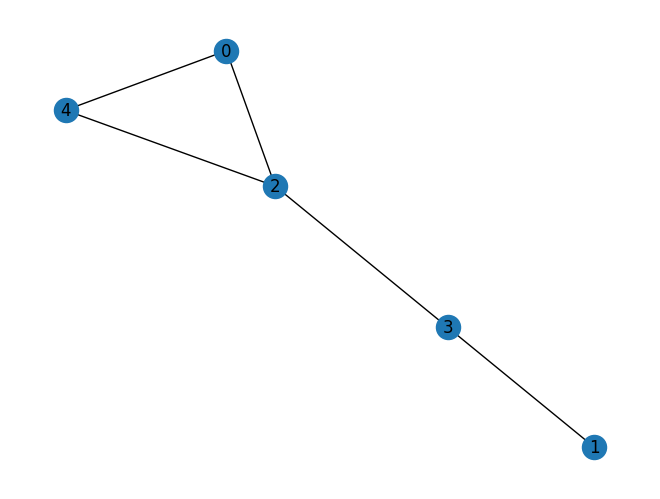

Number of unique isomorphic graphs: 60


In [813]:
import networkx as nx
import itertools

def generate_relabelings(graph):
    """Generate all relabelings of the given graph."""
    nodes = list(graph.nodes)
    permutations = itertools.permutations(nodes)
    relabeled_graphs = []

    for perm in permutations:
        mapping = {nodes[i]: perm[i] for i in range(len(nodes))}
        relabeled_graph = nx.relabel_nodes(graph, mapping)
        relabeled_graphs.append(relabeled_graph)

    return relabeled_graphs

def canonical_form(graph):
    """Return a canonical form of the graph using NetworkX's graph matcher."""
    from networkx.algorithms.isomorphism import GraphMatcher

    def to_tuple(graph):
        return tuple(sorted((min(u, v), max(u, v)) for u, v in graph.edges))

    # Use NetworkX's isomorphism to get the canonical form
    canonical_forms = []
    for relabeled_graph in generate_relabelings(graph):
        canonical_forms.append(to_tuple(relabeled_graph))
    
    return set(canonical_forms)

def count_isomorphic_relabelings(graph):
    """Count how many unique isomorphic graphs can be obtained by relabeling the nodes."""
    canonical_forms = canonical_form(graph)
    return len(canonical_forms)

# Example usage
num_nodes = 5  # Use a small number of nodes for demonstration
graph = nx.random_tree(num_nodes)
nodes_with_degree_2 = [node for node in graph.nodes() if graph.degree(node) >= 2]
if nodes_with_degree_2:
    node = random.choice(nodes_with_degree_2)
    neighbors = list(graph.neighbors(node))
    if len(neighbors) >= 2:
        a, b = random.sample(neighbors, 2)
        graph.add_edge(a, b)
nx.draw(graph, with_labels=True)
plt.show()

count = count_isomorphic_relabelings(graph)
print(f"Number of unique isomorphic graphs: {count}")


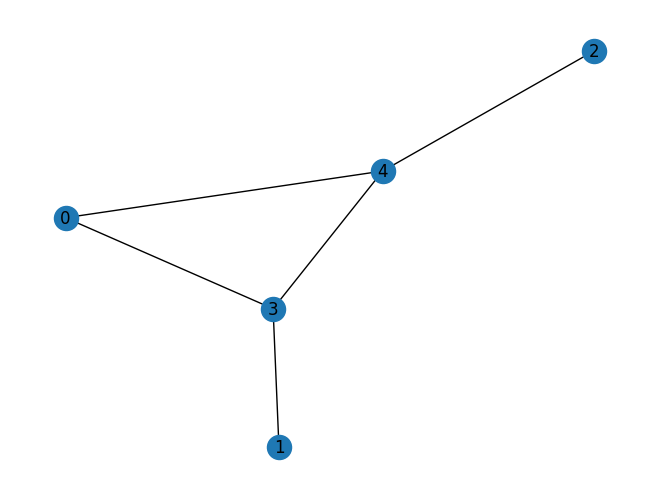

Number of unique isomorphic graphs found: 120


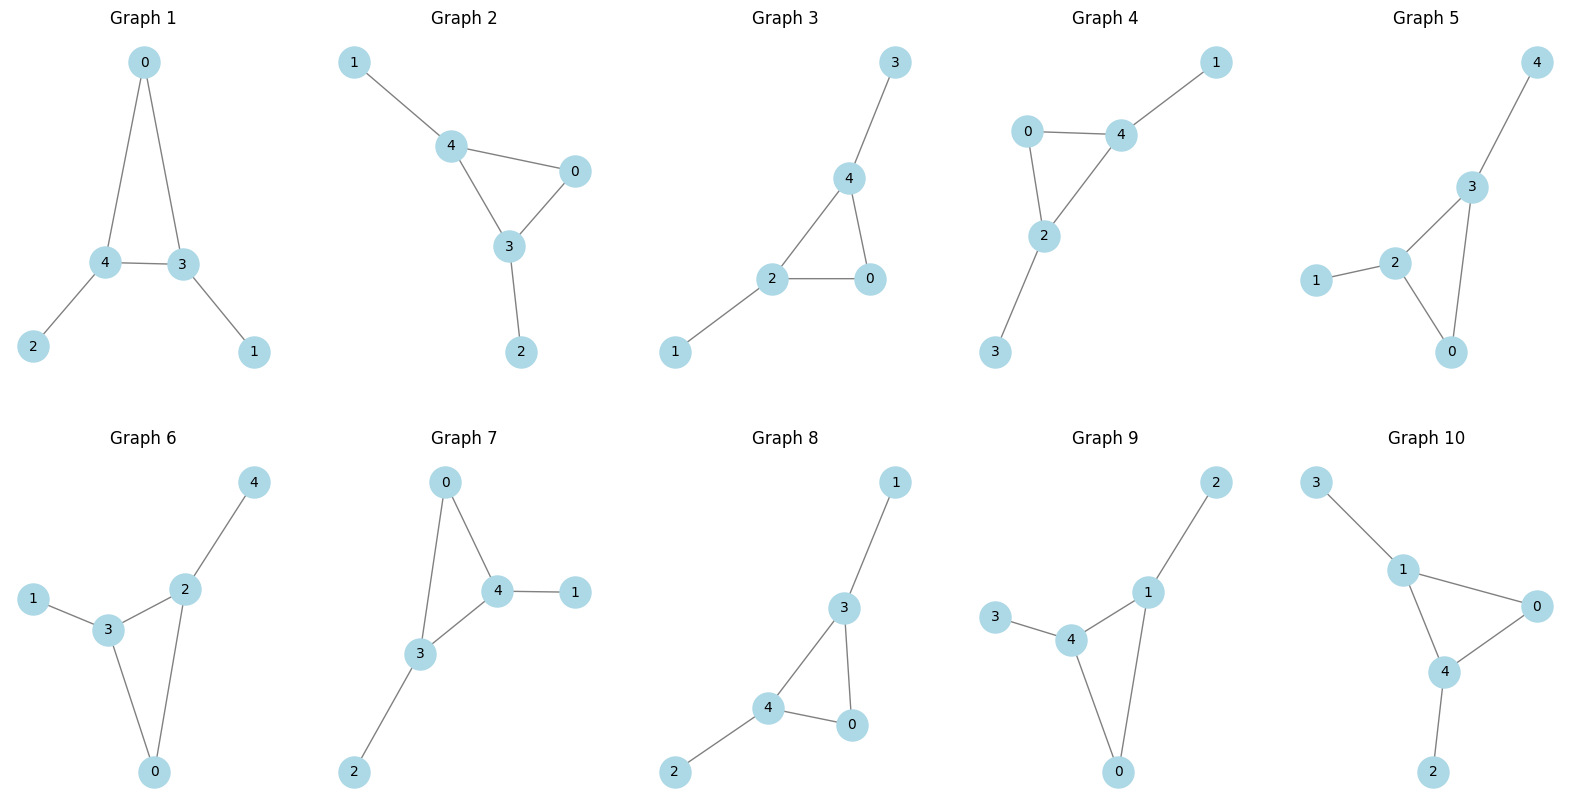

In [815]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

def generate_permutations(graph):
    """Generate all permutations of the nodes in the given graph."""
    nodes = list(graph.nodes)
    return itertools.permutations(nodes)

def relabel_graph(graph, mapping):
    """Relabel the nodes of the graph according to the mapping."""
    return nx.relabel_nodes(graph, mapping)

def is_isomorphic(original_graph, candidate_graph):
    """Check if the candidate graph is isomorphic to the original graph."""
    matcher = nx.algorithms.isomorphism.GraphMatcher(original_graph, candidate_graph)
    return matcher.is_isomorphic()

def find_isomorphic_graphs(original_graph):
    """Find all unique isomorphic graphs by relabeling the original graph."""
    isomorphic_graphs = []
    nodes = list(original_graph.nodes)
    
    # Generate all possible permutations of the nodes
    for perm in generate_permutations(original_graph):
        # Create a mapping based on the permutation
        mapping = {nodes[i]: perm[i] for i in range(len(nodes))}
        
        # Relabel the graph
        relabeled_graph = relabel_graph(original_graph, mapping)
        
        # Check if the relabeled graph is isomorphic to the original graph
        if is_isomorphic(original_graph, relabeled_graph):
            if relabeled_graph not in isomorphic_graphs:
                isomorphic_graphs.append(relabeled_graph)
    
    return isomorphic_graphs

def plot_graphs(graphs):
    """Plot a list of graphs."""
    plt.figure(figsize=(20, 10))
    for i, g in enumerate(graphs[:10]):
        plt.subplot(2, 5, i + 1)
        nx.draw(g, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
        plt.title(f'Graph {i + 1}')
    plt.show()

# Example usage
num_nodes = 5  # Use a small number of nodes for demonstration
graph = nx.random_tree(num_nodes)
nodes_with_degree_2 = [node for node in graph.nodes() if graph.degree(node) >= 2]
if nodes_with_degree_2:
    node = random.choice(nodes_with_degree_2)
    neighbors = list(graph.neighbors(node))
    if len(neighbors) >= 2:
        a, b = random.sample(neighbors, 2)
        graph.add_edge(a, b)

nx.draw(graph, with_labels=True)
plt.show()

isomorphic_graphs = find_isomorphic_graphs(graph)
print(f"Number of unique isomorphic graphs found: {len(isomorphic_graphs)}")

# Plot the first few isomorphic graphs
plot_graphs(isomorphic_graphs)


### --------------------------------

In [774]:
ceros = []
unos = []
for a, l in zip(adj_matrices, labels):
  if l == 1:
    unos.append(a)
  else:
    ceros.append(a)
len(unos), len(ceros)

np.mean([np.sum(c) for c in unos]), np.mean([np.sum(c) for c in ceros])

(32.0, 32.0)

In [765]:
class GraphDataset(Dataset):
    def __init__(self, adj_matrices, labels):
        self.adj_matrices = adj_matrices
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.adj_matrices[idx], self.labels[idx]

In [766]:
def collate_fn(batch):
    adj_matrices, labels = zip(*batch)

    # Find max number of nodes
    max_nodes = max(len(adj) for adj in adj_matrices)

    # Pad adjacency matrices
    padded_adj = []
    for adj in adj_matrices:
        pad_size = max_nodes - len(adj)
        padded = np.pad(adj, ((0, pad_size), (0, pad_size)), mode='constant')
        padded_adj.append(padded)

    # Convert to PyTorch tensors
    padded_adj = np.array(padded_adj)
    adj_tensor = torch.FloatTensor(padded_adj)

    labels_tensor = torch.FloatTensor(labels)

    return adj_tensor, labels_tensor

In [767]:
# Make adjacency matrix from the graphs with cycles and without cycles
adj_matrices_with_cycles = [nx.adjacency_matrix(g).todense() for g in graphs_with_cycles]
adj_matrices_without_cycles = [nx.adjacency_matrix(g).todense() for g in graphs_without_cycles]
print(len(adj_matrices_with_cycles), len(adj_matrices_without_cycles))
print(adj_matrices_with_cycles[0].shape, adj_matrices_without_cycles[0].shape)

# Combine the adjacency matrices into a single dataset
adj_matrices = np.array(adj_matrices_with_cycles + adj_matrices_without_cycles)
adj_matrices.shape

# Create a list with the values of the labels
labels = [1] * len(adj_matrices_with_cycles) + [0] * len(adj_matrices_without_cycles)
labels = np.array(labels)
labels


/var/folders/z7/4w4x_vfs7k79ky63zf8xhj2w0000gn/T/ipykernel_92894/3761643932.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrices_with_cycles = [nx.adjacency_matrix(g).todense() for g in graphs_with_cycles]
/var/folders/z7/4w4x_vfs7k79ky63zf8xhj2w0000gn/T/ipykernel_92894/3761643932.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrices_without_cycles = [nx.adjacency_matrix(g).todense() for g in graphs_without_cycles]


2903 2506
(16, 16) (16, 16)


array([1, 1, 1, ..., 0, 0, 0])

In [768]:
# Create dataset
dataset = GraphDataset(adj_matrices, labels)

# Create train-test split
train_size = int(0.8 * len(dataset))
print(train_size)
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

4327


In [769]:
# Check if train_loader and test_loader are different, they cant have the same graphs
for i, (train_batch, test_batch) in enumerate(zip(train_loader, test_loader)):
    train_adj, train_labels = train_batch
    test_adj, test_labels = test_batch
    if torch.equal(train_adj, test_adj) and torch.equal(train_labels, test_labels):
        print(f"Error: Train and Test batches {i} are the same!")

Epoch 1/1000, Train Loss: 0.6891, Test Loss: 0.6874
Epoch 2/1000, Train Loss: 0.6793, Test Loss: 0.6896
Epoch 3/1000, Train Loss: 0.6720, Test Loss: 0.6912
Epoch 4/1000, Train Loss: 0.6646, Test Loss: 0.6916
Epoch 5/1000, Train Loss: 0.6534, Test Loss: 0.6973
Epoch 6/1000, Train Loss: 0.6433, Test Loss: 0.6950
Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.
Epoch 7/1000, Train Loss: 0.6307, Test Loss: 0.6974
Epoch 8/1000, Train Loss: 0.6125, Test Loss: 0.6964
Epoch 9/1000, Train Loss: 0.6100, Test Loss: 0.6961
Epoch 10/1000, Train Loss: 0.6080, Test Loss: 0.6957
Epoch 11/1000, Train Loss: 0.6065, Test Loss: 0.6960
Epoch 12/1000, Train Loss: 0.6042, Test Loss: 0.6959
Epoch 00013: reducing learning rate of group 0 to 1.0000e-05.
Epoch 13/1000, Train Loss: 0.6028, Test Loss: 0.6965
Epoch 14/1000, Train Loss: 0.6008, Test Loss: 0.6961
Epoch 15/1000, Train Loss: 0.6010, Test Loss: 0.6963
Epoch 16/1000, Train Loss: 0.6006, Test Loss: 0.6962
Epoch 17/1000, Train Loss: 0.6004, Te

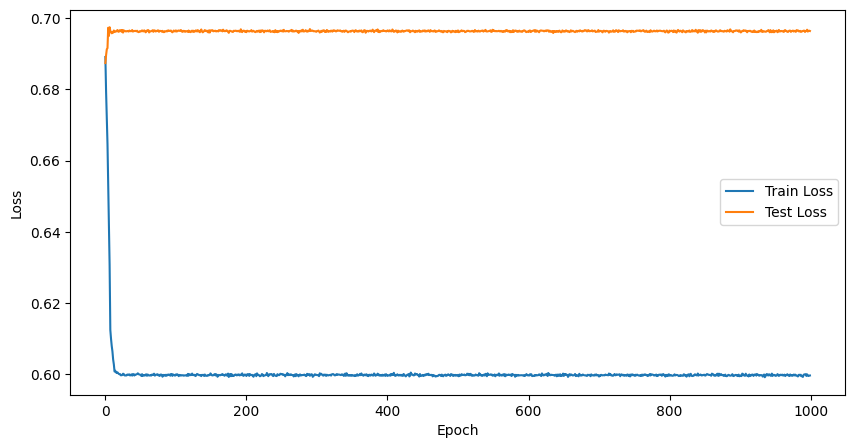

Accuracy: 0.54


In [772]:
# Generate an MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x
    
# Initialize the model
input_size = adj_matrices.shape[1] * adj_matrices.shape[2]
hidden_size = 32
output_size = 1

model = MLP(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
train_losses = []
test_losses = []
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for adj, labels in train_loader:
        adj = adj.view(-1, input_size)
        optimizer.zero_grad()
        outputs = model(adj)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for adj, labels in test_loader:
            adj = adj.view(-1, input_size)
            outputs = model(adj)
            loss = criterion(outputs.squeeze(), labels)
            test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

    scheduler.step(test_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.legend()
plt.show()

# Show accuracy
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for adj, labels in test_loader:
        adj = adj.view(-1, input_size)
        outputs = model(adj)
        predicted = torch.round(torch.sigmoid(outputs))
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

print(f'Accuracy: {correct / total:.2f}')
